# Matplotlib

#### Problem 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special

In [ ]:
def variance(n):
    rand = np.random.normal(size=(n,n))
    means = np.mean(rand, axis=1)
    return np.var(means)

In [ ]:
def create_array(N):
    result = np.empty_like(N, dtype='f')
    for i, n in enumerate(N):
        result[i] = variance(n)
    return result

In [ ]:
N = np.arange(100, 1001, 100)
result = create_array(N)

In [ ]:
plt.plot(N, result)
plt.show()

#### Problem 2

In [ ]:
def plot_3funcs():
    x = np.linspace(- 2 * np.pi, 2 * np.pi, 1000)
    plt.plot(x, np.sin(x))
    plt.plot(x, np.cos(x))
    plt.plot(x, np.arctan(x))
    plt.show()

In [ ]:
plot_3funcs()

#### Problem 3

In [ ]:
def plot_curve():
    x1 = np.linspace(-2, 0.9, 1000)
    x2 = np.linspace(1.1, 6, 1000)
    plt.plot(x1, 1 / (x1 - 1), 'm--', lw=4)
    plt.plot(x2, 1 / (x2 - 1), 'm--', lw=4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()

In [ ]:
plot_curve()

#### Problem 4

In [ ]:
def subplots():
    x = np.linspace(0, 2 * np.pi, 1000)
    
    fig, axes = plt.subplots(2, 2)
    axes[0, 0].plot(x, np.sin(x), 'g-')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[0, 0].set_title("sin(x)")
    
    axes[0, 1].plot(x, np.sin(2 * x), 'r--')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[0, 1].set_title("sin(2x)")
    
    axes[1, 0].plot(x, 2 * np.sin(x), 'b--')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[1, 0].set_title("2sin(x)")

    axes[1, 1].plot(x, 2 * np.sin(2 * x), 'm:')
    plt.axis([0, 2 * np.pi, -2, 2])
    axes[1, 1].set_title("2sin(2x)")
    
    plt.tight_layout()
        
    plt.suptitle("Sine Functions")
        
    plt.show()

In [ ]:
subplots()

#### Problem 5

In [ ]:
def vis_fars():
    fars = np.load('FARS.npy')

    
    fig, axes = plt.subplots(1, 2, figsize=(8,3))
    long = fars[:, 1]
    lat = fars[:, 2]
    axes[0].plot(long, lat, 'k,')
    axes[0].set_xlabel("Latitude")
    axes[0].set_ylabel("Longitude")
    axes[0].set_aspect("equal")
    
    hours = fars[:, 0]
    axes[1].hist(hours, 24, (0, 24))
    axes[1].set_xlabel("Hour")
    axes[1].set_ylabel("Car Crashes")
    axes[1].set_xlim((0,24))
    
    plt.tight_layout()
    
    plt.show()

In [ ]:
vis_fars()

#### Problem 6

In [ ]:
def plot_func():
    x = np.linspace(- 2 * np.pi, 2 * np.pi, 1000)
    y = x.copy()
    X, Y = np.meshgrid(x, y)
    Z = (np.sin(X) * np.sin(Y)) / (X * Y)
    
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    plt.pcolormesh(X, Y, Z, cmap='magma')
    plt.axis([-2 * np.pi, 2 * np.pi, -2 * np.pi, 2 * np.pi])
    plt.colorbar()
    
    plt.subplot(122)
    plt.contour(X, Y, Z, 20, cmap='coolwarm')
    plt.axis([-2 * np.pi, 2 * np.pi, -2 * np.pi, 2 * np.pi])
    plt.colorbar()
    
    plt.show()

In [ ]:
plot_func()

# Data Visualization

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#### Problem 1

In [ ]:
anscombe = np.load('anscombe.npy')

In [ ]:
x = anscombe[:,::2]
y = anscombe[:,1::2]
for i in range(4):
    xi = x[:, i]
    yi = y[:, i]
    plt.scatter(xi, yi)
    plt.xlim(0,20)
    plt.ylim(0,13)
    slope, intercept, r_val, p_val, se = stats.linregress(xi, yi)
    domain = np.linspace(0,20,10)
    plt.plot(domain, slope * domain + intercept, 'r--', label=f'y = {slope:.3f} x + {intercept:.3f}')
    plt.legend()
    plt.title(f'Quartet {i+1}')
    plt.show()
    
    print(f"mean of x{i+1}:", np.mean(xi))
    print(f"variance of x{i+1}:", np.var(xi))
    print(f"mean of y{i+1}:", round(np.mean(yi), 3))
    print(f"variance of y{i+1}:", round(np.var(yi), 3))
    print(f"slope of regression {i+1}:", round(slope, 3))
    print(f"intercept of regression {i+1}:", round(intercept, 3))
    print(f"correlation coefficient of regression {i+1}:", round(r_val, 3))

The means and variances of x and y, correlation coefficients, and slopes and intercepts of the regressions are the same for each plot, but the distributions of points are very different.

#### Problem 2

In [ ]:
N = 10
fig, axes = plt.subplots(N, N, figsize=(10,10), sharex=True, sharey=True)

for n in range(N):
    for v in range(n+1):
        x = np.linspace(0, 1, 100)
        b = special.binom(n, v) * x ** v * (1 - x) ** (n - v)
        axes[n][v].plot(x, b)


#### Problem 3

In [ ]:
mlb = np.load('MLB.npy')

In [ ]:
height = mlb[:, 0]
weight = mlb[:, 1]
age = mlb[:, 2]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axes[0].scatter(height, weight, marker='.')
m, b, r, p, se = stats.linregress(height, weight)
int_h = np.linspace(np.min(height), np.max(height), 6)
int_w = np.linspace(np.min(weight), np.max(weight), 10)
axes[0].plot(int_h, m * int_h + b, 'r', lw=0.5)
axes[0].set_xticks(int_h)
axes[0].set_yticks(int_w)
axes[0].set_xlabel('Height (in)')
axes[0].set_ylabel('Weight (lb)')
axes[0].set_title('Weight vs. Height of MLB Players')

axes[1].scatter(age, weight, marker='.')
slope, intercept, r, p, se = stats.linregress(age, weight)
int_age = np.linspace(np.min(age), np.max(age), 6)
axes[1].plot(int_age, slope * int_age + intercept, 'r', lw=0.5)
axes[1].set_xticks(int_age)
axes[1].set_xlabel('Age (years)')
axes[1].set_title('Age vs. Weight of MLB Players')

plt.tight_layout()
plt.show()

#### Problem 4

In [ ]:
eq = np.load('earthquakes.npy')

In [ ]:
date = eq[:, 0]
mag = eq[:, 1]
long = eq[:, 2]
lat = eq[:, 3]

In [ ]:
in_year = np.zeros(10)
years = np.array(date, dtype=int)
total = [sum(years == year) for year in np.unique(years)]

plt.bar(np.unique(years), total)
plt.xticks(np.unique(years))
plt.title("Number of Earthquakes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")

plt.show()

In [ ]:
plt.hist(mag, bins=40)
plt.title("Magnititude Frequency")
plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")

plt.show()

In [ ]:
plt.scatter(long, lat, marker='.', c=mag, cmap="Reds")
plt.colorbar()
plt.title('Earthquake Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.axis("equal")

plt.show()

#### Problem 5

In [ ]:
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)
X, Y = np.meshgrid(x, y)
Z = (1 - X) ** 2 + 100 * (Y - X ** 2) ** 2

fig, axes = plt.subplots(1, 2)

axes[0].pcolormesh(X, Y, Z, cmap="coolwarm")
axes[0].scatter(1, 1, c='k')
axes[1].contour(X, Y, Z, 20, cmap="viridis")
axes[1].scatter(1, 1, c='k')

plt.show()

#### Problem 6

In [ ]:
country_data = np.load("countries.npy")

In [ ]:
pop = country_data[:, 0]
GDP = country_data[:, 1]
m_height = country_data[:, 2]
f_height = country_data[:, 3]

In [ ]:
countries = np.array(["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"])

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

GDP_ind = np.argsort(GDP)[::-1]
GDP_sorted = GDP[GDP_ind]
countries_sortedby_GDP = countries[GDP_ind]

axes[0, 0].barh(np.arange(len(countries_sortedby_GDP)), GDP_sorted)
axes[0, 0].set_yticks(np.arange(len(countries_sortedby_GDP)))
axes[0, 0].set_yticklabels(countries_sortedby_GDP)
axes[0, 0].set_xlabel("GDP (in billions of US dollars)")
axes[0, 0].set_title("GDP by Country")

axes[0, 1].scatter(pop, GDP)
axes[0, 1].set_xscale("log")
axes[0, 1].set_yscale("log")
axes[0, 1].set_xlabel("Population (in millions of people)")
axes[0, 1].set_ylabel("GDP (in billions of US dollars)")
axes[0, 1].set_title("GDP vs. Population Size")

pop_ind = np.argsort(pop)[::-1]
pop_sorted = pop[pop_ind]
countries_sortedby_pop = countries[pop_ind]

axes[1, 0].barh(np.arange(len(countries_sortedby_pop)), pop_sorted)
axes[1, 0].set_yticks(np.arange(len(countries_sortedby_pop)))
axes[1, 0].set_yticklabels(countries_sortedby_pop)
axes[1, 0].set_xlabel("Population (in millions of people)")
axes[1, 0].set_title("Population by Country")

axes[1, 1].hist(m_height, edgecolor='k', alpha=0.3, bins=10, label="avg. male height")
axes[1, 1].hist(f_height, edgecolor='k', alpha=0.3, bins=10, label="avg. female height")
axes[1, 1].set_xlabel("Height (in cm)")
axes[1, 1].set_ylabel("Number of countries")
axes[1, 1].legend()
axes[1, 1].set_title("Height Frequency")

plt.tight_layout()
plt.show()

# Pandas I

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Problem 1

In [ ]:
labels = np.arange(0, 51, 2)
series = pd.Series((i ** 2 - 1 for i in labels), index = labels)
series[series.index % 3 == 0] = 0
print(series)

#### Problem 2

In [ ]:
def stock_val(p, d=100):
    dates = pd.date_range("1/1/2000", "12/31/2000")
    value = pd.Series([np.random.binomial(1, p) for date in dates], index = dates)
    value[value == 0] = -1
    value[0] = d
    tot_val = value.cumsum()
    tot_val[tot_val < 0] = 0
    return tot_val

In [ ]:
stock1 = stock_val(0.4, 100)
stock2 = stock_val(0.6, 30)
stock3 = stock_val(0.5, 50)
stock1.plot()
stock2.plot()
stock3.plot()
plt.ylabel('Value')
plt.show()

#### Problem 3

In [ ]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

#### Problem 4

In [ ]:
pd.merge(studentInfo[studentInfo['Sex'] == 'M'], otherInfo, how='left')[['ID', 'Age', 'GPA']]

#### Problem 5

In [ ]:
crime = pd.read_csv('crime_data.txt', delimiter=',', index_col = 'Year', skiprows=1)

In [ ]:
crime['Crime-Rate'] = crime['Total'] / crime['Population']

In [ ]:
crime['Crime-Rate'].plot()
plt.ylabel("Crime Rate")
plt.show()

In [ ]:
crime['Crime-Rate'].nlargest(5)

In [ ]:
print("Average number of total crimes:", crime['Total'].mean())
print("Average number of burglary crimes:", crime['Burglary'].mean())

In [ ]:
list(crime[(crime['Total'] < crime['Total'].mean()) & (crime['Burglary'] > crime['Burglary'].mean())].index)

In [ ]:
plt.plot(crime['Population'], crime['Murder'])
plt.xlabel("Population")
plt.ylabel("Murders")
plt.show()

In [ ]:
crime1980 =  crime[[crime.index[i] >= 1980 and crime.index[i] < 1990 for i 
                    in range(len(crime))]][['Population', 'Violent', 'Robbery']]
crime1980.to_csv('crime1980.csv')

#### Problem 6

In [ ]:
from pydataset import data
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('titanic.csv', header=0)

In [ ]:
data.drop(['Sibsp', 'Parch', 'Cabin', 'Boat', 'Body', 'home.dest'], axis=1, inplace=True)

In [ ]:
data.dropna(subset=['Survived'], inplace=True)

In [ ]:
data['Survived'] = data['Survived'].astype(bool)

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [ ]:
titanic.to_csv('new_titanic.csv')

In [ ]:
print("Number of people that survived:", data['Survived'].sum())

In [ ]:
print("Percentage of passengers that survived:", round(data['Survived'].sum() / len(data), 3) * 100, "%")

In [ ]:
print("Average ticket price:", round(data['Fare'].mean(), 2))

In [ ]:
print("Most expensive ticket cost:", round(data['Fare'].max(), 2))

In [ ]:
print("Oldest Survivor:", round(data[data['Survived'] == True]['Age'].max(), 3))

In [ ]:
print("Youngest Survivor:", round(data[data['Survived'] == True]['Age'].min(), 3))

In [ ]:
print("Oldest Non-survivor:", round(data[data['Survived'] == False]['Age'].max(), 3))

In [ ]:
print("Youngest Non-survivor:", round(data[data['Survived'] == False]['Age'].min(), 3))

# Pandas II

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from pydataset import data

In [ ]:
arb = data('Arbuthnot')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
arb.plot("Year", "Mortality", ax=axes[0], title="Mortality in London (1629-1710)")
arb.plot(x="Year", y="Males", ax=axes[1])
arb.plot(x="Year", y="Females", ax=axes[1], title="Christenings in London (1629-1710)")

plt.show()

In [ ]:
trees = data('trees')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
trees.plot(kind='scatter', x='Volume', y='Girth', ax=axes[0], title="Girth vs. Volume")
trees.plot(kind='scatter', x='Volume', y='Height', ax=axes[1], title="Height vs. Volume")

plt.show()

In [ ]:
lung = data('lung')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
lung.plot(kind='scatter', x='time', y='wt.loss', ax=axes[0], title="Weight Loss over Time")
lung.plot(kind='scatter', x='meal.cal', y='wt.loss', ax=axes[1], title="Weight Loss vs Meal Calories")

plt.show()

In [ ]:
road = data('road')

In [ ]:
road.head()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
road_sorted = road.sort_values('deaths', ascending=False)
road_sorted.plot(kind='bar', y='deaths', ax=axes[0], title='Road Deaths')
road.plot(kind='scatter', x='drivers', y='deaths', ax=axes[1], title="Deaths vs. Number of Drivers")

plt.show()

In [ ]:
bfeed = data('bfeed')

In [ ]:
bfeed.head()

In [ ]:
bfeed.plot(kind='hist', y='duration', bins=15, title="Duration")
plt.plot()

# Pandas III

#### Problem 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import numpy as np

In [ ]:
iris = data('iris')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ['b', 'r', 'c']
for species, c in zip(iris.Species.unique(), colors):
    species_plot = iris[iris['Species'] == species]
    species_plot.plot(kind='scatter', x='Sepal.Length', y='Sepal.Width', ax=axes[0], color=c, label=species)
    
for species, c in zip(iris.Species.unique(), colors):
    species_plot = iris[iris['Species'] == species]
    species_plot.plot(kind='scatter', x='Petal.Length', y='Petal.Width', ax=axes[1], color=c, label=species)

plt.show()

In [ ]:
print("Setosas are easiest to distinguish from the others\nby sepal and petal length.")

In [ ]:
print("To identify the flower's species, measure petal and\nsepal length and compare to the species' averages.")

In [ ]:
poisons = data('poisons')

In [ ]:
poisons.boxplot('time', by='poison', grid=False)
plt.show()

In [ ]:
print("Poison 3 is most deadly.")

In [ ]:
treatment_plot = poisons.groupby(['poison', 'treat']).mean().unstack()
treatment_plot.plot(kind='bar')
plt.show()

In [ ]:
print("Choose treatment A if unsure of the poison.")

In [ ]:
diamonds = data('diamonds')

In [ ]:
diamonds_plot = diamonds.groupby(['color', 'cut']).mean().unstack()

In [ ]:
diamonds_plot.plot(kind='bar', y='price')
plt.legend(fontsize=8)
plt.plot()

"Premium diamonds are the most expensive cut and color 'J' is the most expensive color.

In [ ]:
diamonds_H = diamonds[diamonds['color']=='H'].groupby('cut').mean()

In [ ]:
diamonds_H['Volume'] = diamonds_H['x'] * diamonds_H['y'] * diamonds_H['x']

In [ ]:
diamonds_H.plot(kind='bar', y='Volume')
plt.plot()

The fair cut sells for a higher price than the ideal cut because these diamonds are larger on average.

#### Problem 2

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.groupby('Embarked').mean().unstack()['Survived']

In [ ]:
titanic.pivot_table(values='Survived', index='Embarked', columns='Sex')

Both men and women who embarked from C were most likely to survive. This could be due to the proportion of individuals in class embarking from each location.

In [ ]:
titanic.pivot_table(values='Survived', index='Embarked', columns='Pclass', aggfunc="count")

In [ ]:
titanic.dropna(subset=['Age'], inplace=True)
age = pd.qcut(titanic['Age'], 3)
titanic.pivot_table(values='Survived', index='Embarked', columns=age, dropna=True, aggfunc="count")

# Pandas IV

#### Problem 1

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [9]:
DJIA = pd.read_csv('DJIA.csv', parse_dates=True, index_col='DATE')
DJIA.drop(DJIA[DJIA['VALUE'] == '.'].index, inplace=True)
DJIA['VALUE'] = DJIA['VALUE'].astype(float)

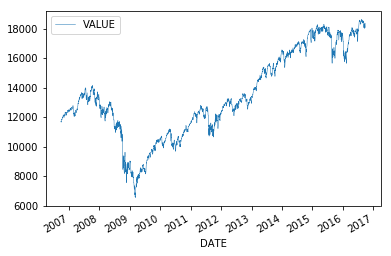

In [10]:
DJIA.plot(lw=0.5)
plt.show()

#### Problem 2

In [236]:
paychecks = pd.read_csv('paychecks.csv', names=['Paycheck'])
payday1 = pd.date_range(start='3/13/2008', periods=47, freq='WOM-1FRI')
payday3 = pd.date_range(start='3/13/2008', periods=46, freq='WOM-3FRI')
payday = payday1.union(payday3)
paychecks = paychecks.set_index(payday)

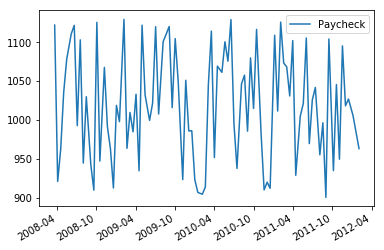

In [12]:
paychecks.plot()
plt.show()

#### Problem 3

In [13]:
finances = pd.read_csv('finances.csv')
finances.index = pd.period_range(start='2008-09', periods=84, freq='Q-AUG')

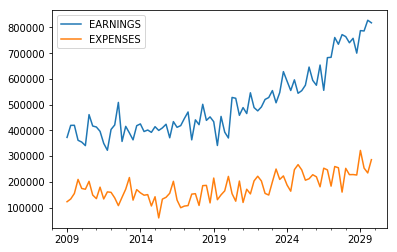

In [14]:
finances.plot()
plt.show()

#### Problem 4

In [15]:
traffic = pd.read_csv('website_traffic.csv', parse_dates=['ENTER', 'LEAVE'])

In [16]:
traffic['DURATION'] = traffic['LEAVE'] - traffic['ENTER']
traffic['DURATION'] = [traffic['DURATION'][i].total_seconds() for i in range(len(traffic))]
traffic.set_index('ENTER', inplace=True)

In [17]:
minute = traffic.resample("T").mean()
hour = traffic.resample("H").mean()

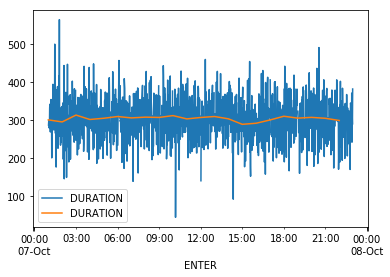

In [18]:
fig, axes = plt.subplots()
minute.plot(ax = axes)
hour.plot(ax = axes)
plt.show()

#### Problem 5

In [50]:
DJIA = pd.read_csv('DJIA.csv', parse_dates=True, index_col='DATE')
DJIA.drop(DJIA[DJIA['VALUE'] == '.'].index, inplace=True)
DJIA['VALUE'] = DJIA['VALUE'].astype(float)

In [51]:
DJIA = DJIA - DJIA.shift(1)

In [52]:
DJIA.sort_values('VALUE', inplace=True)
DJIA.dropna(inplace=True)

In [53]:
DJIA[-1:]

,VALUE
DATE,
2008-10-13,936.42


The single day with the largest gain was 10/13/2008.

In [54]:
DJIA[:1]

,VALUE
DATE,
2008-09-29,-777.68


The single day with the largest loss was 9/29/2008.

In [55]:
months = DJIA.resample('M').sum()

In [56]:
months.sort_values('VALUE', inplace=True)

In [57]:
months[-1:]

,VALUE
DATE,
2015-10-31,1378.84


The month with the largest gain was 10/2015

In [58]:
months[:1]

,VALUE
DATE,
2008-10-31,-1525.65


The month with the largest loss was 10/2008.

#### Problem 6

In [59]:
DJIA = pd.read_csv('DJIA.csv', parse_dates=True, index_col='DATE')
DJIA.drop(DJIA[DJIA['VALUE'] == '.'].index, inplace=True)
DJIA['VALUE'] = DJIA['VALUE'].astype(float)

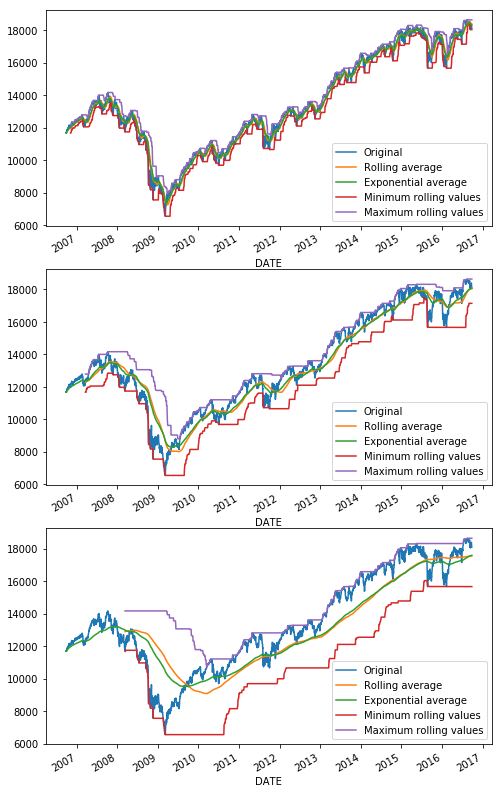

In [69]:
fig, axes = plt.subplots(3, 1, figsize=(8,15))
window = [30, 120, 365]
for i in range(3):
    DJIA.plot(ax=axes[i])
    DJIA.rolling(window=window[i]).mean().plot(ax=axes[i])
    DJIA.ewm(span=window[i]).mean().plot(ax=axes[i])
    DJIA.rolling(window=window[i]).min().plot(ax=axes[i])
    DJIA.rolling(window=window[i]).max().plot(ax=axes[i])
    axes[i].legend(['Original', 'Rolling average', 'Exponential average', 'Minimum rolling values', 'Maximum rolling values'])

With a shorter window, the approximations are close to the original data. With a longer window, the approximations are less exact.

# Comparing Segments of Time Series

In [89]:
import pandas as pd
from datetime import datetime

In [181]:
ts = pd.read_csv('payems.csv', index_col='DATE')

In [182]:
ts['PAYEMS'] = ts['PAYEMS'] * 1000

In [232]:
y19 = ts[:'12/1/99']
y20 = ts['1/1/00':]

y19.index.str.replace(, lambda date[:-2]: )

,PAYEMS
DATE,
1/1/00,131007000
2/1/00,131138000
3/1/00,131605000
4/1/00,131898000
5/1/00,132117000


In [193]:
s1 = ts[:'8/1/43']
s2 = ts['7/1/36':'11/1/48']
s3 = ts['2/1/44':'3/1/56']
s4 = ts['11/1/47':'3/1/60']
s5 = ts['7/1/52':'10/1/64']
s6 = ts['8/1/56':'9/1/68']
s7 = ts['4/1/59':'7/1/71']
s8 = ts['12/1/68':'4/1/81']
s9 = ts['11/1/72':'8/1/85']
s10 = ts['1/1/79':'12/1/90']
s11 = ts['7/1/80':'4/1/93']
s12 = ts['7/1/89':'8/1/01']
s13 = ts['3/1/00':'4/1/12']
s14 = ts['12/1/06':]

In [208]:
s1['PAYEMS'] = s1['PAYEMS'] / s1['PAYEMS']['7/1/29']
s2['PAYEMS'] = s2['PAYEMS'] / s2['PAYEMS']['7/1/37']
s3['PAYEMS'] = s3['PAYEMS'] / s3['PAYEMS']['2/1/45']
s4['PAYEMS'] = s4['PAYEMS'] / s4['PAYEMS']['11/1/48']
s5['PAYEMS'] = s5['PAYEMS'] / s5['PAYEMS']['7/1/53']
s6['PAYEMS'] = s6['PAYEMS'] / s6['PAYEMS']['8/1/57']
s7['PAYEMS'] = s7['PAYEMS'] / s7['PAYEMS']['4/1/60']
s8['PAYEMS'] = s8['PAYEMS'] / s8['PAYEMS']['12/1/69']
s9['PAYEMS'] = s9['PAYEMS'] / s9['PAYEMS']['11/1/73']
s10['PAYEMS'] = s10['PAYEMS'] / s10['PAYEMS']['1/1/80']
s11['PAYEMS'] = s11['PAYEMS'] / s11['PAYEMS']['7/1/81']
s12['PAYEMS'] = s12['PAYEMS'] / s12['PAYEMS']['7/1/90']
s13['PAYEMS'] = s13['PAYEMS'] / s13['PAYEMS']['3/1/01']
s14['PAYEMS'] = s14['PAYEMS'] / s14['PAYEMS']['12/1/07']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

[]

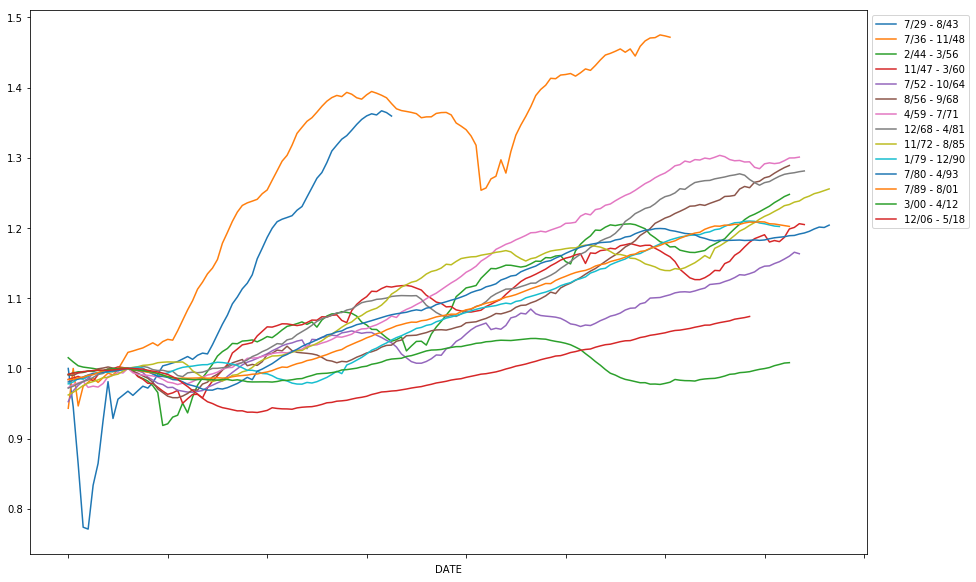

In [228]:
fig, axes = plt.subplots(figsize=(15,10))
s1.plot(ax=axes)
s2.plot(ax=axes)
s3.plot(ax=axes)
s4.plot(ax=axes)
s5.plot(ax=axes)
s6.plot(ax=axes)
s7.plot(ax=axes)
s8.plot(ax=axes)
s9.plot(ax=axes)
s10.plot(ax=axes)
s11.plot(ax=axes)
s12.plot(ax=axes)
s13.plot(ax=axes)
s14.plot(ax=axes)
plt.legend(['7/29 - 8/43', '7/36 - 11/48', '2/44 - 3/56', 
           '11/47 - 3/60', '7/52 - 10/64', '8/56 - 9/68', 
           '4/59 - 7/71', '12/68 - 4/81', '11/72 - 8/85', 
           '1/79 - 12/90', '7/80 - 4/93', '7/89 - 8/01', 
           '3/00 - 4/12', '12/06 - 5/18'], bbox_to_anchor=(1,1))
plt.plot()